<h1 style = "color:#464f69"><center>Image Transformation</center></h1>
<h2><center>Application of Affine matrices in Image Transformations </center></h2>

<h3>Introduction:</h3>
<p>In the ever-evolving landscape of digital imagery, the ability to manipulate and transform images with precision and finesse has become a cornerstone of various fields, ranging from computer graphics to medical imaging. At the heart of this transformative process lies the elegant mathematical framework of affine transformations.</p>
<h3>Understanding Affine Transformations</h3>
<p>There are many different types of geometrical operations like translation, rotation, scaling, and shearing that can be considered as affine transformations in linear algebra. In the case of affine transformations, unlike most transformations, which are often more complex, they retain collinearity and parallelism, allowing their use in many practical image processing applications.</p>


<h3>Types of transformations</h3>
<p>Some of the common transformations are:</p>
<li><b>Translation:</b>
In Euclidean geometry, a translation is a geometric transformation that moves every point of a figure, shape or space by the same distance in a given direction. A translation can also be interpreted as the addition of a constant vector to every point, or as shifting the origin of the coordinate system. Translation matrix is given by:</li>

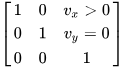
<li><b>Reflection:</b>
In mathematics, a reflection is a mapping from a Euclidean space to itself that is an isometry with a hyperplane as a set of fixed points. This set is called the axis of reflection. The image of a figure by a reflection is its mirror image in the axis or plane of reflection. Reflection matrix is given by:</li>

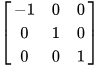
<li><b>Scale:</b>
In affine geometry, uniform scaling is a linear transformation that enlarges (increases) or shrinks (diminishes) objects by a scale factor that is the same in all directions. The result of uniform scaling is similar (in the geometric sense) to the original. A scale factor of 1 is normally allowed, so that congruent shapes are also classed as similar. Scaling matrix is given by:</li>

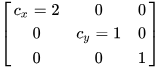
<li><b>Rotate:</b>
Rotation or rotational motion is the circular movement of an object around a central line, known as axis of rotation. Rotation matrix is given by:</li>

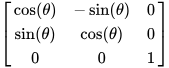
<li><b>Shear:</b>
In plane geometry, a shear mapping is an affine transformation that displaces each point in a fixed direction by an amount proportional to its signed distance from a given line parallel to that direction.[1] This type of mapping is also called shear transformation, transvection, or just shearing. Shearing matrix is given by:</li>

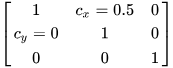

<p><b>Note:</b> When above matrices are multiplied with the image coordinates in question, the image transforms.</p>

--------------------------------------

<h3>Importing required libraries</h3>

In [1]:
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter
import numpy as np
import cv2
bold = '\033[1m'
bold_end = '\033[0m'

<h3>Importing image</h3>

 Original image: 
AxesImage(80,52.8;496x369.6)


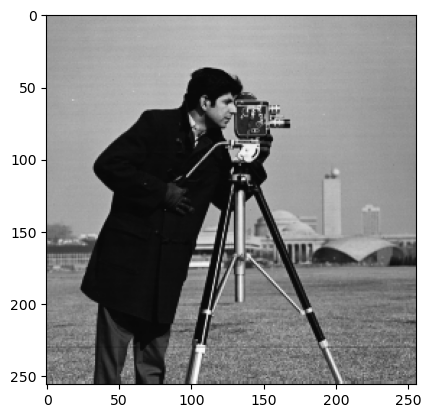

In [2]:
img1 = cv2.imread('cameraman.png')
print(bold,'Original image:', bold_end) 
print(plt.imshow(img1))

------------------------------------------------

<h3>Translation</h3>

<p>Defining translation matrix: </p>

In [3]:
def get_translation(vx,vy):
    return np.array([
        [1, 0, vy],
        [0, 1, vx],
        [0, 0, 1]
])

<p>Defining function to perform translation:</p>

In [4]:
def translation_function(img1,x,y):
    S1 = get_translation(x,y)
    img=img1.copy()
    # Defining a larger stage to perform image translation.
    img_transformed = np.zeros((512,512,3), dtype=np.int16) 
    
    for i, row in enumerate(img):
        for j, col in enumerate(row):
            pixel_data = img[i, j]
            input_coords = np.array([i, j, 1])
            i_out, j_out, _ = (S1 @ input_coords).astype(int)
            img_transformed[i_out, j_out] = pixel_data

    plt.imshow(img_transformed)

<p>Translating image by 100 units along x axis</p>

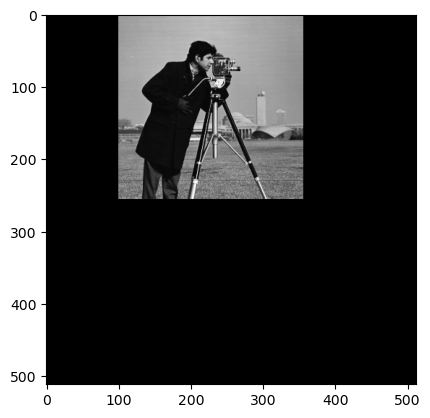

In [5]:
translation_function(img1,100,0)

---------------------------------------------

<h3>Reflection</h3>
<p>Defining reflection matrix:</p>

In [6]:
def get_reflection():
    return np.array([
        [-1, 0, 0],
        [0, 1, 0],
        [0, 0, 1]
])

Defining function to perform Reflection:

In [7]:
def reflection_function(img1):
    S1 = get_reflection()
    img=img1.copy()
    # Defining a larger stage to perform image translation.
    img_transformed = np.zeros((512,512,3), dtype=np.int16) 
    
    for i, row in enumerate(img):
        for j, col in enumerate(row):
            pixel_data = img[i, j]
            input_coords = np.array([i, j, 1])
            i_out, j_out, _ = (S1 @ input_coords).astype(int)
            img_transformed[i_out, j_out] = pixel_data

    plt.imshow(img_transformed)

Reflecting image along x axis

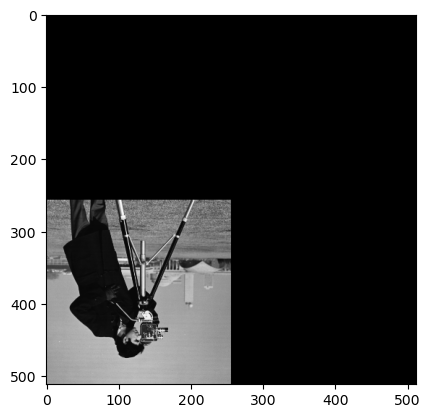

In [8]:
reflection_function(img1)

--------------------------------

<h3>Scaling</h3>
<p>Defining scaling matrix:</p>

In [9]:
def get_scale(x,y):
    return np.array([
        [y, 0, 0],
        [0, x, 0],
        [0, 0, 1]
])

Defining function to perform scaling:

In [10]:
def scaling_function(img1,x,y):
    S1 = get_scale(x,y)
    img=img1.copy()
    # Defining a larger stage to perform image translation.
    img_transformed = np.zeros((512,512,3), dtype=np.int16) 
    
    for i, row in enumerate(img):
        for j, col in enumerate(row):
            pixel_data = img[i, j]
            input_coords = np.array([i, j, 1])
            i_out, j_out, _ = (S1 @ input_coords).astype(int)
            img_transformed[i_out, j_out] = pixel_data

    plt.imshow(img_transformed)

scaling image along x axis by 2 times

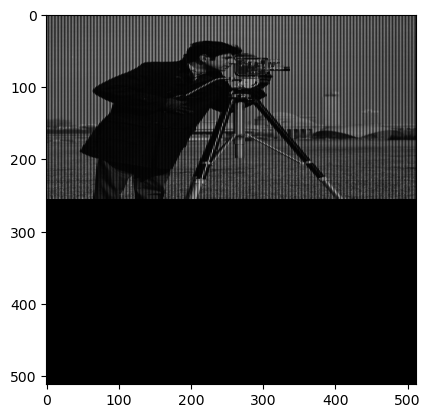

In [11]:
scaling_function(img1,2,1)

-------------------------

<h3>Rotation with translation</h3>
<p>Defining rotation matrix:</p>

In [12]:
def get_rotation(x):
    return np.array([
        [np.cos(x), -np.sin(x), 250],
        [np.sin(x), np.cos(x), 100],
        [0, 0, 1]
])

Defining function to perform rotation:

In [13]:
def rotation_function(img1,x):
    S1 = get_rotation(x)
    img=img1.copy()
    # Defining a larger stage to perform image translation.
    img_transformed = np.zeros((512,512,3), dtype=np.int16) 
    
    for i, row in enumerate(img):
        for j, col in enumerate(row):
            pixel_data = img[i, j]
            input_coords = np.array([i, j, 1])
            i_out, j_out, _ = (S1 @ input_coords).astype(int)
            img_transformed[i_out, j_out] = pixel_data

    plt.imshow(img_transformed)

Rotating image by 45 degrees

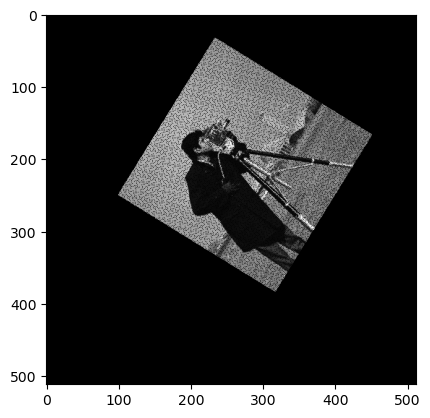

In [14]:
rotation_function(img1,45)

----------------------

<h3>Shear</h3>
<p>Defining shear matrix:</p>

In [15]:
def get_shear(x,y):
    return np.array([
        [1, y, 0],
        [x, 1, 0],
        [0, 0, 1]
])

Defining shear to perform shear:

In [16]:
def shear_function(img1,x,y):
    S1 = get_shear(x,y)
    img=img1.copy()
    # Defining a larger stage to perform image translation.
    img_transformed = np.zeros((512,512,3), dtype=np.int16) 
    
    for i, row in enumerate(img):
        for j, col in enumerate(row):
            pixel_data = img[i, j]
            input_coords = np.array([i, j, 1])
            i_out, j_out, _ = (S1 @ input_coords).astype(int)
            img_transformed[i_out, j_out] = pixel_data

    plt.imshow(img_transformed)

Shearing image along x axis

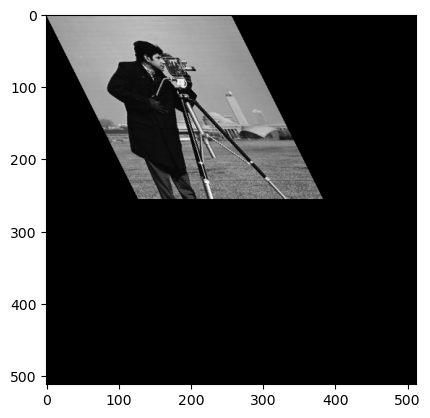

In [17]:
shear_function(img1,0.5,0)

<b>Note: </b>
<p>Affine matrices serves as the basic building block of image processing realm. OpenCV library (often imported as cv2 in Python) offers a rich set of functionalities for implementing affine transformations with concise and efficient code.</p>

<h3>Conclusion</h3>
<p>Having scrutinized affine transformations, our study has proven to be not just an experience but also knowledge that helps us realize how profound mathematics is when it comes to shaping the visual realm. Thus, with this, we take leave of this venture that has given us an awareness of the fine, versatile, and beauty of affine matrices in the manipulation and treatment of images.</p>